### Text classification with Deep Neural Networks

In [235]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [236]:
train_data=pd.read_csv('sentiment_dataset_train.csv')
dev_data=pd.read_csv('sentiment_dataset_dev.csv') 
test_data=pd.read_csv('sentiment_dataset_test.csv') 
train_data.head()

,id,review,rating
0,0,Arrived about 10pm and check in was painless. ...,4
1,1,I checked in at 4pm even tough room was not re...,2
2,2,"I chose this hotel, as it was in a good locati...",2
3,3,"Great location, super close to shops & a 10min...",4
4,4,I was in the Sir Adam Hotel to visit a friend....,3


In [237]:
train_data['rating'].unique()

array(['4', '2', '3', '1', '5',
       'Tables not made up prior to guest seating. 2.'], dtype=object)

In [238]:
train_data[train_data['rating']=='Tables not made up prior to guest seating. 2.']

,id,review,rating
30944,30944,We thought that it might be worthwhile eating ...,Tables not made up prior to guest seating. 2.


#### In addition to rating 1,2,3,4,5, there is one data with rating 'Tables not made up prior to guest seating. 2.' that must be deleted.

In [239]:
train_data.drop(train_data.index[30944], inplace=True)

In [240]:
#checking the labels again
train_data['rating'].unique()

array(['4', '2', '3', '1', '5'], dtype=object)

In [241]:
dev_data['rating'].unique()

array([2, 4, 5, 3, 1], dtype=int64)

### Data spliting

In [98]:
X_train = train_data['review']#.to_numpy()
y_train = train_data['rating']
X_dev = dev_data['review']#.to_numpy()
y_dev = dev_data['rating']

In [99]:
# creating dummies of target variable for train lables and converting to numpy array
y_train = pd.get_dummies(y_train)
y_train = np.array(y_train) 
y_train

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [100]:
# creating dummies of target variable for dev lables and converting to numpy array
y_dev = pd.get_dummies(y_dev)
y_dev = np.array(y_dev)
y_dev

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [101]:
X_train

0        Arrived about 10pm and check in was painless. ...
1        I checked in at 4pm even tough room was not re...
2        I chose this hotel, as it was in a good locati...
3        Great location, super close to shops & a 10min...
4        I was in the Sir Adam Hotel to visit a friend....
                               ...                        
35000    Paris is always welcome city, but this time th...
35001    Beautiful place very clean and welcoming irini...
35002    The hotel is ok considering the price we paid....
35003    First your stuck if you miss last tram at midn...
35004    The staff was very nice. The room was fine - n...
Name: review, Length: 35004, dtype: object

In [102]:
#A sample data
X_train[0]

"Arrived about 10pm and check in was painless.   The only downside to this hotel is if you are looking for a city centre location. If you don't mind some walking and want to be out of the noise of the city then this place is ideal.   Hotel has a bar and restaurant, decent size gym and roof terrace with sun loungers.   The rooms are a good size, especially when traveling with a large teenager. Good sized lounge with double sofa bed, kitchen area and dining table. Main bedroom is a good size with double wardrobes and safe. Shower room is well sized with plenty of towels, good supply of toiletries, and hairdryer.   Fridge comes stocked with bottles of water to get you started and you can get more at the hotel bar  A 5 minute walk takes you to Marina metro station and your access to…"

### Cleaning the text

In [103]:
#For train data
import re
from nltk.corpus import stopwords

stopwords_eng = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub("[^a-z]", " ", text)
    words = [word for word in text.split() if word not in stopwords_eng]
    text = " ".join(words)
    return text

X_train = X_train.map(clean_text)
X_train.head()

0    arrived pm check painless downside hotel looki...
1    checked pm even tough room ready staff busy mo...
2    chose hotel good location room bath spa availa...
3    great location super close shops min walk main...
4    sir adam hotel visit friend enjoyed time bar d...
Name: review, dtype: object

In [104]:
X_train[0]

'arrived pm check painless downside hotel looking city centre location mind walking want noise city place ideal hotel bar restaurant decent size gym roof terrace sun loungers rooms good size especially traveling large teenager good sized lounge double sofa bed kitchen area dining table main bedroom good size double wardrobes safe shower room well sized plenty towels good supply toiletries hairdryer fridge comes stocked bottles water get started get hotel bar minute walk takes marina metro station access'

In [105]:
X_dev = X_dev.map(clean_text)
X_dev.head()

0    hotel position good center town hotel services...
1    big room comfortable clean next underground fa...
2    hotel located near kurf rstendamm quiet side s...
3    booking rooms made booking accor website le cl...
4    excellent hotel fantastic swimming pool warm w...
Name: review, dtype: object

In [106]:
from keras.preprocessing.text import Tokenizer

In [107]:
num_words = 6000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = pd.Series(tokenizer.texts_to_sequences(X_train))
X_train_seq.head()

0    [87, 148, 30, 1043, 1, 201, 57, 252, 8, 671, 9...
1    [147, 148, 31, 2527, 2, 269, 3, 321, 468, 378,...
2    [532, 1, 4, 8, 2, 376, 369, 142, 87, 1, 148, 1...
3    [11, 8, 277, 43, 307, 325, 35, 149, 186, 66, 3...
4    [2973, 1, 175, 556, 267, 24, 42, 239, 486, 5, ...
dtype: object

In [108]:
len(X_train_seq[0])

76

In [109]:
tokenizer.fit_on_texts(X_dev)

X_dev_seq = pd.Series(tokenizer.texts_to_sequences(X_dev))
X_dev_seq.head()

0    [1, 1142, 4, 284, 298, 1, 548, 3025, 2020, 224...
1    [102, 2, 39, 13, 49, 679, 1434, 30, 398, 284, ...
2    [1, 82, 116, 2680, 2835, 97, 190, 91, 102, 39,...
3    [195, 5, 84, 195, 1777, 462, 1155, 472, 3049, ...
4    [62, 1, 300, 614, 51, 317, 402, 11, 571, 20, 3...
dtype: object

In [110]:
len(X_dev_seq[0])

27

### A quick view to the distribution of reveiw word's lenghts in the data

Review length: 
Mean 46.77 words (19.913302)


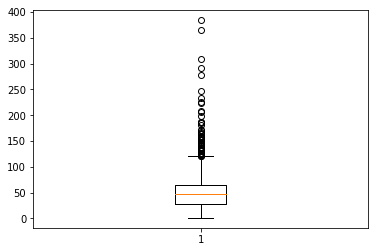

In [111]:
# Summarize review length
import matplotlib.pyplot as plt
print("Review length: ")
result = [len(x) for x in X_train_seq]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

#### So, maxlen=130 would be a good estimation

In [112]:
from keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_seq, maxlen=130)

In [113]:
X_train_pad.shape

(35004, 130)

In [114]:
X_dev_pad = pad_sequences(X_dev_seq, maxlen=130)

In [115]:
X_dev_pad.shape

(7499, 130)

### Standardize the data for getting better results

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
scaler.fit(X_train_pad)

StandardScaler()

In [118]:
X_train_pad = scaler.transform(X_train_pad)
X_train_pad.shape

(35004, 130)

In [120]:
scaler.fit(X_dev_pad)

StandardScaler()

In [121]:
X_dev_pad = scaler.transform(X_dev_pad)
X_dev_pad.shape

(7499, 130)

### Training the network

In [231]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout,Conv1D, MaxPooling1D,Flatten, Activation
from keras import optimizers

from keras.regularizers import l2  #for weight regularization
from keras.constraints import max_norm  #for weight constraint

model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=130)) #input_length=130
#model.add(LSTM(128, return_sequences=False))
#model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001)))  #Weight regularization
#model.add(Dropout(0.3))
#model.add(GlobalMaxPool1D())
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 130, 32)           192000    
_________________________________________________________________
flatten_17 (Flatten)         (None, 4160)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                266304    
_________________________________________________________________
dropout_68 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 5)               

In [232]:
optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [234]:
from keras.callbacks import ModelCheckpoint
file_name = 'weight.hdf5'
mcp_save = ModelCheckpoint(file_name, save_best_only=True, monitor='val_loss', mode='min')   
history = model.fit(X_train_pad, y_train, epochs=300, validation_data=(X_dev_pad, y_dev), callbacks=[mcp_save], batch_size=100)

Train on 35004 samples, validate on 7499 samples
Epoch 1/300
35004/35004 [==============================] - 3s 98us/step - loss: 1.5783 - accuracy: 0.2468 - val_loss: 1.5578 - val_accuracy: 0.2652
Epoch 2/300
35004/35004 [==============================] - 2s 68us/step - loss: 1.5574 - accuracy: 0.2692 - val_loss: 1.5547 - val_accuracy: 0.2734
Epoch 3/300
35004/35004 [==============================] - 2s 67us/step - loss: 1.5505 - accuracy: 0.2759 - val_loss: 1.5637 - val_accuracy: 0.2720
Epoch 4/300
35004/35004 [==============================] - 2s 67us/step - loss: 1.5408 - accuracy: 0.2880 - val_loss: 1.5628 - val_accuracy: 0.2714
Epoch 5/300
35004/35004 [==============================] - 2s 68us/step - loss: 1.5269 - accuracy: 0.2990 - val_loss: 1.5683 - val_accuracy: 0.2686
Epoch 6/300
35004/35004 [==============================] - 2s 68us/step - loss: 1.5021 - accuracy: 0.3212 - val_loss: 1.5888 - val_accuracy: 0.2654
Epoch 7/300
35004/35004 [==============================] - 2s 6

Epoch 56/300
35004/35004 [==============================] - 3s 78us/step - loss: 1.0934 - accuracy: 0.5206 - val_loss: 3.1206 - val_accuracy: 0.2498
Epoch 57/300
35004/35004 [==============================] - 3s 77us/step - loss: 1.0918 - accuracy: 0.5230 - val_loss: 3.0099 - val_accuracy: 0.2499
Epoch 58/300
35004/35004 [==============================] - 3s 84us/step - loss: 1.0871 - accuracy: 0.5259 - val_loss: 3.1864 - val_accuracy: 0.2491
Epoch 59/300
35004/35004 [==============================] - 3s 76us/step - loss: 1.0860 - accuracy: 0.5235 - val_loss: 3.1199 - val_accuracy: 0.2470
Epoch 60/300
35004/35004 [==============================] - 3s 77us/step - loss: 1.0812 - accuracy: 0.5269 - val_loss: 3.1858 - val_accuracy: 0.2482
Epoch 61/300
35004/35004 [==============================] - 3s 76us/step - loss: 1.0815 - accuracy: 0.5286 - val_loss: 3.2214 - val_accuracy: 0.2508
Epoch 62/300
35004/35004 [==============================] - 3s 78us/step - loss: 1.0817 - accuracy: 0.5281

Epoch 111/300
35004/35004 [==============================] - 2s 65us/step - loss: 1.0322 - accuracy: 0.5456 - val_loss: 4.3112 - val_accuracy: 0.2522
Epoch 112/300
35004/35004 [==============================] - 2s 64us/step - loss: 1.0211 - accuracy: 0.5482 - val_loss: 4.6646 - val_accuracy: 0.2539
Epoch 113/300
35004/35004 [==============================] - 2s 64us/step - loss: 1.0246 - accuracy: 0.5470 - val_loss: 4.4854 - val_accuracy: 0.2539
Epoch 114/300
35004/35004 [==============================] - 2s 64us/step - loss: 1.0286 - accuracy: 0.5455 - val_loss: 4.5297 - val_accuracy: 0.2539
Epoch 115/300
35004/35004 [==============================] - 2s 65us/step - loss: 1.0228 - accuracy: 0.5486 - val_loss: 4.5113 - val_accuracy: 0.2511
Epoch 116/300
35004/35004 [==============================] - 2s 64us/step - loss: 1.0257 - accuracy: 0.5490 - val_loss: 4.4996 - val_accuracy: 0.2523
Epoch 117/300
35004/35004 [==============================] - 2s 65us/step - loss: 1.0252 - accuracy:

35004/35004 [==============================] - 2s 71us/step - loss: 0.9961 - accuracy: 0.5570 - val_loss: 5.6303 - val_accuracy: 0.2540
Epoch 166/300
35004/35004 [==============================] - 2s 70us/step - loss: 0.9968 - accuracy: 0.5594 - val_loss: 5.6034 - val_accuracy: 0.2556
Epoch 167/300
35004/35004 [==============================] - 2s 70us/step - loss: 0.9955 - accuracy: 0.5608 - val_loss: 5.4375 - val_accuracy: 0.2503
Epoch 168/300
35004/35004 [==============================] - 2s 71us/step - loss: 0.9917 - accuracy: 0.5630 - val_loss: 5.6929 - val_accuracy: 0.2499
Epoch 169/300
35004/35004 [==============================] - 2s 71us/step - loss: 0.9975 - accuracy: 0.5573 - val_loss: 5.4534 - val_accuracy: 0.2536
Epoch 170/300
35004/35004 [==============================] - 3s 72us/step - loss: 0.9914 - accuracy: 0.5603 - val_loss: 5.6789 - val_accuracy: 0.2519
Epoch 171/300
35004/35004 [==============================] - 3s 87us/step - loss: 0.9964 - accuracy: 0.5626 - val_

Epoch 220/300
35004/35004 [==============================] - 2s 68us/step - loss: 0.9730 - accuracy: 0.5678 - val_loss: 6.5799 - val_accuracy: 0.2524
Epoch 221/300
35004/35004 [==============================] - 2s 68us/step - loss: 0.9711 - accuracy: 0.5675 - val_loss: 6.5454 - val_accuracy: 0.2535
Epoch 222/300
35004/35004 [==============================] - 2s 68us/step - loss: 0.9845 - accuracy: 0.5638 - val_loss: 6.4883 - val_accuracy: 0.2503
Epoch 223/300
35004/35004 [==============================] - 2s 68us/step - loss: 0.9729 - accuracy: 0.5687 - val_loss: 6.6855 - val_accuracy: 0.2571
Epoch 224/300
35004/35004 [==============================] - 2s 70us/step - loss: 0.9724 - accuracy: 0.5669 - val_loss: 6.3985 - val_accuracy: 0.2566
Epoch 225/300
35004/35004 [==============================] - 2s 70us/step - loss: 0.9749 - accuracy: 0.5672 - val_loss: 6.6481 - val_accuracy: 0.2543
Epoch 226/300
35004/35004 [==============================] - 2s 71us/step - loss: 0.9707 - accuracy:

35004/35004 [==============================] - 2s 71us/step - loss: 0.9605 - accuracy: 0.5754 - val_loss: 7.5442 - val_accuracy: 0.2570
Epoch 275/300
35004/35004 [==============================] - 3s 72us/step - loss: 0.9606 - accuracy: 0.5730 - val_loss: 7.1258 - val_accuracy: 0.2584
Epoch 276/300
35004/35004 [==============================] - 3s 72us/step - loss: 0.9650 - accuracy: 0.5744 - val_loss: 7.1710 - val_accuracy: 0.2591
Epoch 277/300
35004/35004 [==============================] - 3s 71us/step - loss: 0.9599 - accuracy: 0.5744 - val_loss: 6.9828 - val_accuracy: 0.2536
Epoch 278/300
35004/35004 [==============================] - 3s 73us/step - loss: 0.9659 - accuracy: 0.5707 - val_loss: 7.0609 - val_accuracy: 0.2523
Epoch 279/300
35004/35004 [==============================] - 3s 75us/step - loss: 0.9558 - accuracy: 0.5758 - val_loss: 7.1680 - val_accuracy: 0.2519
Epoch 280/300
35004/35004 [==============================] - 3s 75us/step - loss: 0.9590 - accuracy: 0.5746 - val_